<a href="https://colab.research.google.com/github/rajdipj/ML/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DS/train.csv')
train_df.head()

test_df = pd.read_csv('/content/drive/MyDrive/DS/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_df.shape

(1460, 81)

In [ ]:
test_df.shape

(1459, 80)

In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

There are too many vectors. this dataset has so many dimentions. Later we have to decrease these vectors.

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
pd.set_option("display.max_rows", None)  # Set to None to show all rows


missing_values_train = train_df.isnull().sum()

# Display missing values for train data in a single row
print(missing_values_train.to_frame())

                  0
Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0


In [ ]:
pd.reset_option("display.max_rows")

In [ ]:
# Count columns with missing values and their counts for train data
columns_with_missing_values = train_df.columns[train_df.isnull().any()]
missing_value_counts_per_column = train_df[columns_with_missing_values].isnull().sum()

# Display count of columns with missing values and their corresponding counts
print("Number of Columns with Missing Values:", len(columns_with_missing_values))
print("Missing Value Counts per Column:")
print(missing_value_counts_per_column)


Number of Columns with Missing Values: 19
Missing Value Counts per Column:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Calculate missing value percentages for columns with missing values in train data
missing_percentage_train = (train_df.isnull().sum() / len(train_df)) * 100
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0]  # Filter columns with missing values

# Display the columns with missing values and their corresponding missing value percentages in train data
print("Columns with Missing Values and Their Missing Value Percentages:")
print(missing_percentage_train)


Columns with Missing Values and Their Missing Value Percentages:
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


before doing any pre processing, lets merge the datasets.

we will be dropping vectors with missing values more than 40%.

In [ ]:
import pandas as pd

# Concatenate train and test data
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Calculate missing value percentages for each column in combined data
missing_percentage_combined = (combined_df.isnull().sum() / len(combined_df)) * 100

# Identify columns with 40% or more missing values (excluding 'SalePrice')
columns_to_drop = missing_percentage_combined[(missing_percentage_combined >= 40) & (missing_percentage_combined.index != 'SalePrice')].index

# Drop the identified columns from the combined data
combined_df_cleaned = combined_df.drop(columns=columns_to_drop, axis=1)

# Display the list of dropped columns
print("Dropped Columns:")
print(columns_to_drop)



Dropped Columns:
Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [ ]:
# Display the updated combined data
print("Updated Combined Data after Removing Columns:")
print(combined_df_cleaned)

Updated Combined Data after Removing Columns:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
2914  2915         160       RM         21.0     1936   Pave      Reg   
2915  2916         160       RM         21.0     1894   Pave      Reg   
2916  2917          20       RL        160.0    20000   Pave      Reg   
2917  2918          85       RL         62.0    10441   Pave      Reg   
2918  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch

In [ ]:
# Separate categorical and numerical variables
categorical_vars = combined_df_cleaned.select_dtypes(include=['object']).columns
numerical_vars = combined_df_cleaned.select_dtypes(include=['int', 'float']).columns

# Display the separated variables
print("Categorical Variables:")
print(categorical_vars)
print("\nNumerical Variables:")
print(numerical_vars)

Categorical Variables:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Numerical Variables:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Tot

In [ ]:
combined_df_cleaned[categorical_vars].isnull().sum()

MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

Usually, missing values can be imputed using 'Mode' for categorical values but here missing value can be indication of missing that feature from that record. for example, house that does not have garage will have missing values in vectors related to garage. so imputing them with mode will lead to a misleading results.

Hence we will fill the missing values with a place holder named 'Missing'.

In [ ]:
# Impute missing values in categorical variables with 'Missing'
combined_df_cleaned[categorical_vars] = combined_df_cleaned[categorical_vars].fillna('Missing')

# Display the updated combined data after imputation
print("Updated Combined Data after Categorical Imputation:")
print(combined_df_cleaned)


Updated Combined Data after Categorical Imputation:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
2914  2915         160       RM         21.0     1936   Pave      Reg   
2915  2916         160       RM         21.0     1894   Pave      Reg   
2916  2917          20       RL        160.0    20000   Pave      Reg   
2917  2918          85       RL         62.0    10441   Pave      Reg   
2918  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch Scree

Now lets deal with the missing value in Numerical vectors.

In [ ]:
# Calculate the number of missing values for each numerical variable
numerical_missing_counts = combined_df_cleaned[numerical_vars].isnull().sum()

# Display the number of missing values for each numerical variable
print("Number of Missing Values for Numerical Variables:")
print(numerical_missing_counts)


Number of Missing Values for Numerical Variables:
Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64


For numerical vectors, I am thinking about imputing missing values with median, but first I have to check if there are enough outliers to affect the median value.

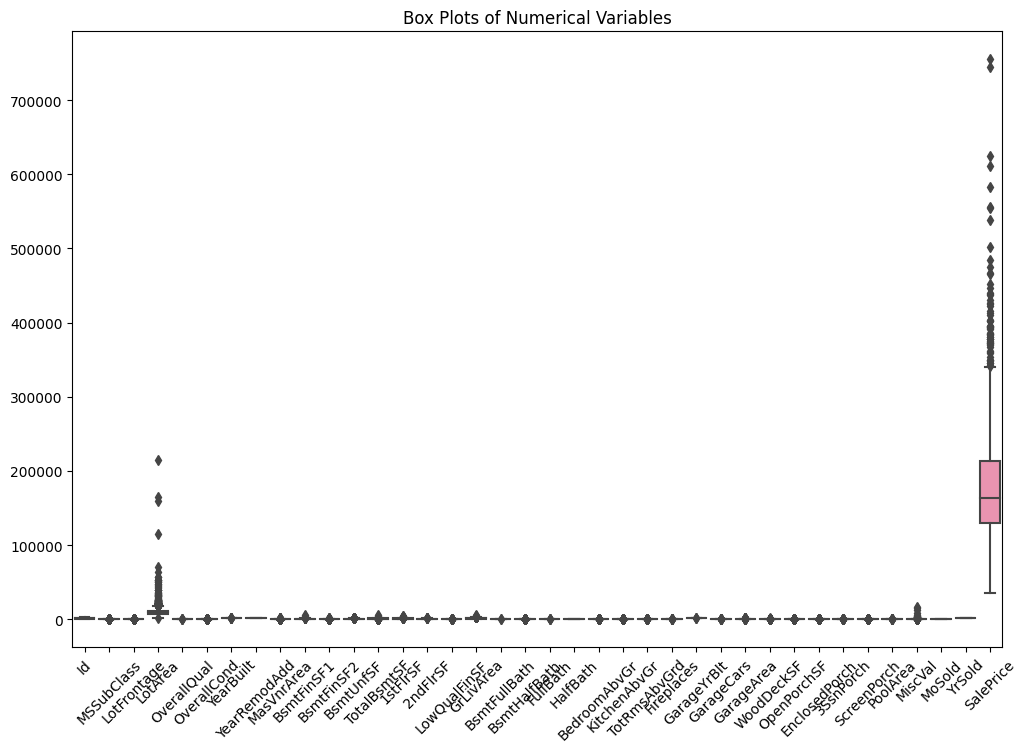

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df_cleaned[numerical_vars])
plt.xticks(rotation=45)
plt.title("Box Plots of Numerical Variables")
plt.show()


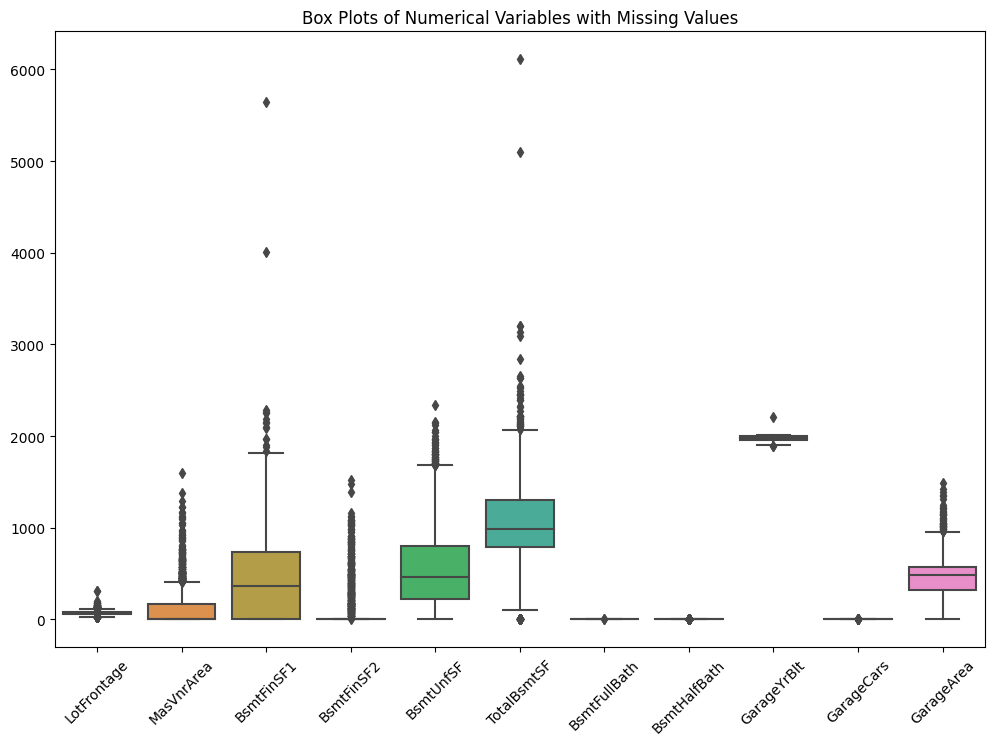

In [ ]:
# Filter numerical variables with missing values
numerical_vars_with_missing = numerical_vars[numerical_missing_counts > 0]
numerical_vars_with_missing = numerical_vars_with_missing.drop('SalePrice', errors='ignore')

# Create box plots for numerical variables with missing values
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df_cleaned[numerical_vars_with_missing])
plt.xticks(rotation=45)
plt.title("Box Plots of Numerical Variables with Missing Values")
plt.show()



In [ ]:
Q1 = combined_df_cleaned['TotalBsmtSF'].quantile(0.25)
Q3 = combined_df_cleaned['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1

# Define a multiplier (e.g., 1.5)
multiplier = 1.5

# Identify potential outliers
lower_outliers = combined_df_cleaned['TotalBsmtSF'] < (Q1 - multiplier * IQR)
upper_outliers = combined_df_cleaned['TotalBsmtSF'] > (Q3 + multiplier * IQR)

# Count the number of potential outliers
num_lower_outliers = lower_outliers.sum()
num_upper_outliers = upper_outliers.sum()

print("Number of Lower Outliers:", num_lower_outliers)
print("Number of Upper Outliers:", num_upper_outliers)

Number of Lower Outliers: 78
Number of Upper Outliers: 44


In [ ]:
Q1 = combined_df_cleaned['BsmtFinSF1'].quantile(0.25)
Q3 = combined_df_cleaned['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1

# Define a multiplier (e.g., 1.5)
multiplier = 1.5

# Identify potential outliers
lower_outliers = combined_df_cleaned['BsmtFinSF1'] < (Q1 - multiplier * IQR)
upper_outliers = combined_df_cleaned['BsmtFinSF1'] > (Q3 + multiplier * IQR)

# Count the number of potential outliers
num_lower_outliers = lower_outliers.sum()
num_upper_outliers = upper_outliers.sum()

print("Number of Lower Outliers:", num_lower_outliers)
print("Number of Upper Outliers:", num_upper_outliers)

Number of Lower Outliers: 0
Number of Upper Outliers: 15


I have seen these records and found that these information are very important for analysis. So we are keeping them and imputing missing values in Numerical values.

In [ ]:
# Impute missing values in numerical variables with median
for col in numerical_vars_with_missing:
    median_value = combined_df_cleaned[col].median()
    combined_df_cleaned[col].fillna(median_value, inplace=True)

# Confirm that missing values are filled
print("Missing Values after Median Imputation:")
print(combined_df_cleaned[numerical_vars_with_missing].isnull().sum())

Missing Values after Median Imputation:
LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64


In [ ]:
# Check for missing values in the combined data frame
missing_values = combined_df_cleaned.isnull().sum()

# Display missing values counts
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])


Missing Values in Each Column:
SalePrice    1459
dtype: int64


In [ ]:
pd.set_option("display.max_rows", None)  # Set to None to show all rows
combined_df_cleaned.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [ ]:
combined_df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


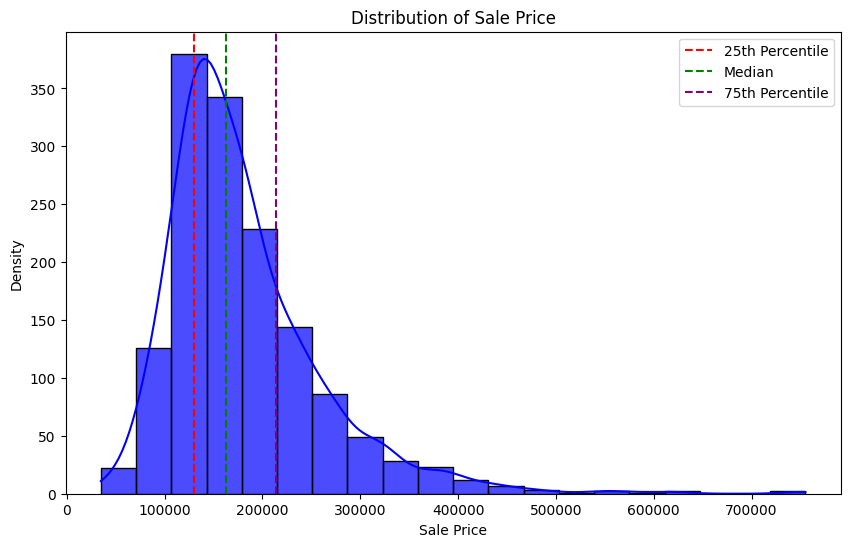

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram and density plot for SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=20, kde=True, color='blue', alpha=0.7)
plt.axvline(train_df['SalePrice'].quantile(0.25), color='red', linestyle='dashed', label='25th Percentile')
plt.axvline(train_df['SalePrice'].median(), color='green', linestyle='dashed', label='Median')
plt.axvline(train_df['SalePrice'].quantile(0.75), color='purple', linestyle='dashed', label='75th Percentile')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Distribution of Sale Price')
plt.legend()
plt.show()


As we can see the distribution is skewed towards right side. The presence of a long right tail suggests that there are a few properties with much higher sale prices than the majority of properties.This could be due to factors such as luxury properties, unique features, or location.

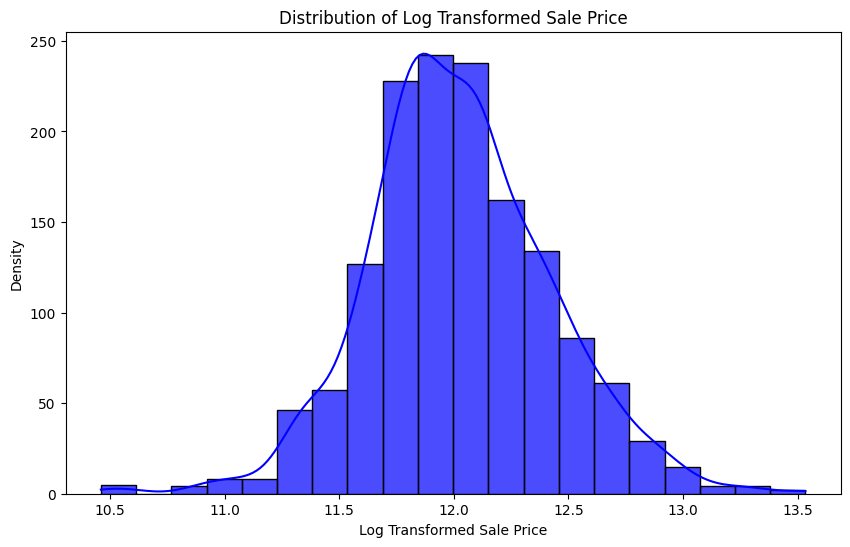

In [ ]:

import seaborn as sns

# Apply logarithmic transformation to SalePrice
train_df['SalePrice_Log'] = np.log(train_df['SalePrice'])

# Create a histogram and density plot for the transformed SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice_Log'], bins=20, kde=True, color='blue', alpha=0.7)
plt.xlabel('Log Transformed Sale Price')
plt.ylabel('Density')
plt.title('Distribution of Log Transformed Sale Price')
plt.show()


<ipython-input-29-b975d7c56cdd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


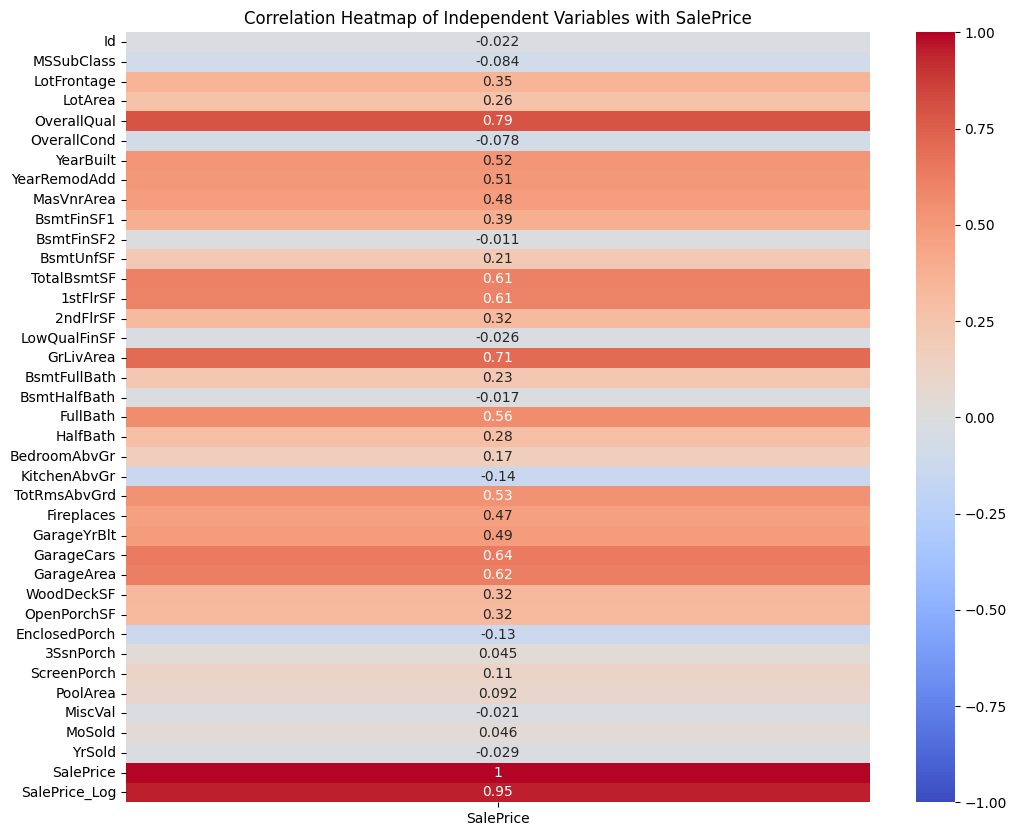

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Independent Variables with SalePrice')
plt.show()



As we can see, variables such as OverallQual (Overall material and finish quality), YearBuilt: Original construction date, YearRemodAdd: Remodel date, TotalBsmtSF: Total square feet of basement area, 1stFlrSF: First Floor square feet, GrLivArea: Above grade (ground) living area square feet, FullBath: Full bathrooms above grade, TotRmsAbvGrd: Total rooms above grade (does not include bathrooms), GarageCars: Size of garage in car capacity, GarageArea: Size of garage in square feet has high positive corelation with SalePrice. Whereas, variable such as MSSubClass: The building class, OverallCond: Overall condition rating, BsmtFinSF2: Type 2 finished square feet, LowQualFinSF: Low quality finished square feet (all floors), BsmtHalfBath: Basement half bathrooms, Kitchen above Ground, EnclosedPorch: Enclosed porch area in square feet and some other has almost no effect on target variable.

In [ ]:
# Drop the 'Id' column from the DataFrame
combined_df_cleaned.drop('Id', axis=1, inplace=True)

# Check the DataFrame to verify that the 'Id' column has been dropped
print(combined_df_cleaned.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0    

In [ ]:
combined_df_cleaned.shape[1]

75

In [ ]:
# Create a new feature 'TotalSF' by adding the areas of basement, first floor, and second floor
combined_df_cleaned['TotalSF'] = combined_df_cleaned['TotalBsmtSF'] + combined_df_cleaned['1stFlrSF'] + combined_df_cleaned['2ndFlrSF']

# Check the first few rows of the DataFrame to verify the new feature
print(combined_df_cleaned[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF']].head())


   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0        856.0       856       854   2566.0
1       1262.0      1262         0   2524.0
2        920.0       920       866   2706.0
3        756.0       961       756   2473.0
4       1145.0      1145      1053   3343.0


In [ ]:
combined_df_cleaned.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500.0,2566.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500.0,2524.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500.0,2706.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,2473.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000.0,3343.0


In [ ]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Find variables with correlation greater than 0.5 or less than -0.5 with SalePrice
high_corr_variables = correlation_matrix['SalePrice'][(correlation_matrix['SalePrice'] > 0.5) | (correlation_matrix['SalePrice'] < -0.5)]
# Drop 'SalePrice' and 'SalePrice_Log' from high_corr_variables
high_corr_variables = high_corr_variables.drop(['SalePrice', 'SalePrice_Log'], errors='ignore')


# Print the high correlational variables
print("High Correlational Variables:")
print(high_corr_variables)

High Correlational Variables:
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64


<ipython-input-34-2654338d1734>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


In [ ]:
subset_df = combined_df_cleaned[high_corr_variables.index]

In [ ]:
subset_df.shape[0]

2919

In [ ]:
subset_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0


In [ ]:
  import numpy as np

# Retrieve 'SalePrice' column from combined_df_cleaned
#sale_price_column = combined_df_cleaned['SalePrice']

# Concatenate 'sale_price_column' with 'subset_df'
#subset_df_with_sale_price = pd.concat([subset_df, sale_price_column], axis=1)

# Split the data into train and test based on 'SalePrice' availability
#train_data = subset_df_with_sale_price[subset_df_with_sale_price['SalePrice'].notnull()]
#test_data = subset_df_with_sale_price[subset_df_with_sale_price['SalePrice'].isnull()]

# Drop 'SalePrice' from test_data
#test_data = test_data.drop(columns=['SalePrice'])

# Print the shapes of train_data and test_data
#print("Train Data Shape:", train_data.shape)
#print("Test Data Shape:", test_data.shape)


In [ ]:
# Identify categorical and numerical variables
categorical_vars = subset_df.select_dtypes(include=['object']).columns
numerical_vars = subset_df.select_dtypes(include=['int64', 'float64']).columns

# Print the list of categorical and numerical variables
print("Categorical Variables:")
print(categorical_vars)
print("\nNumerical Variables:")
print(numerical_vars)


Categorical Variables:
Index([], dtype='object')

Numerical Variables:
Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the continuous numerical variables for scaling
numerical_vars_to_scale = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

# Create a subset DataFrame with only continuous numerical variables
subset_df_numerical_scaled = subset_df[numerical_vars_to_scale]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the continuous numerical variables
subset_df_numerical_scaled = scaler.fit_transform(subset_df_numerical_scaled)

# Convert the scaled data back to a DataFrame
subset_df_numerical_scaled_df = pd.DataFrame(subset_df_numerical_scaled, columns=numerical_vars_to_scale)

# Concatenate scaled numerical variables with non-scaled variables
subset_df_scaled = pd.concat([subset_df[['OverallQual', 'YearBuilt', 'YearRemodAdd']], subset_df_numerical_scaled_df], axis=1)

# Print the first few rows of the scaled subset_df
print(subset_df_scaled.head())
print(subset_df_scaled.shape[1])


   OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003    -0.444278 -0.773861   0.413547   
1            6       1976          1976     0.477158  0.261075  -0.471891   
2            7       2001          2002    -0.299027 -0.610718   0.563755   
3            7       1915          1970    -0.671232 -0.506205   0.427382   
4            8       2000          2000     0.211621 -0.037170   1.378042   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0  0.781366      0.986849    0.306418    0.348888  
1  0.781366     -0.287758    0.306418   -0.059804  
2  0.781366     -0.287758    0.306418    0.627542  
3 -1.027363      0.349546    1.619830    0.785446  
4  0.781366      1.624153    1.619830    1.686426  
10


In [ ]:
# Retrieve 'SalePrice' column from combined_df_cleaned
sale_price_column = combined_df_cleaned['SalePrice']

# Concatenate 'sale_price_column' with 'subset_df'
subset_df_with_sale_price = pd.concat([subset_df_scaled, sale_price_column], axis=1)

# Split the data into train and test based on 'SalePrice' availability
train_data = subset_df_with_sale_price[subset_df_with_sale_price['SalePrice'].notnull()]
test_data = subset_df_with_sale_price[subset_df_with_sale_price['SalePrice'].isnull()]

# Drop 'SalePrice' from test_data
test_data = test_data.drop(columns=['SalePrice'])

# Print the shapes of train_data and test_data
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (1460, 11)
Test Data Shape: (1459, 10)


In [ ]:
train_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,-0.444278,-0.773861,0.413547,0.781366,0.986849,0.306418,0.348888,208500.0
1,6,1976,1976,0.477158,0.261075,-0.471891,0.781366,-0.287758,0.306418,-0.059804,181500.0
2,7,2001,2002,-0.299027,-0.610718,0.563755,0.781366,-0.287758,0.306418,0.627542,223500.0
3,7,1915,1970,-0.671232,-0.506205,0.427382,-1.027363,0.349546,1.619830,0.785446,140000.0
4,8,2000,2000,0.211621,-0.037170,1.378042,0.781366,1.624153,1.619830,1.686426,250000.0


In [ ]:
test_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
1460,5,1961,1961,-0.385270,-0.671897,-1.195262,-1.027363,-0.925062,-1.006994,1.194138
1461,6,1958,1958,0.629217,0.431865,-0.339470,-1.027363,-0.287758,-1.006994,-0.747149
1462,5,1997,1998,-0.280871,-0.590326,0.253457,0.781366,-0.287758,0.306418,0.042369
1463,6,1998,1998,-0.285410,-0.595424,0.204046,0.781366,0.349546,0.306418,-0.013362
1464,8,1992,1992,0.518010,0.306959,-0.436315,0.781366,-0.925062,0.306418,0.153831


Now, lets start applying models on the above dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting subsets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)


X_train shape: (1168, 10)
X_valid shape: (292, 10)
y_train shape: (1168,)
y_valid shape: (292,)


Lets start by applying variouls algorithms on the data. We will start with my Faviourite Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = random_forest_model.predict(X_valid)

# Evaluate the model's performance
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 861711142.7148119
Root Mean Squared Error: 29354.916840536476
R-squared: 0.8876565194962132


Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the SVM model
svm_model = SVR(kernel='linear', C=1)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_svm = svm_model.predict(X_valid)

# Evaluate the model's performance
mse_svm = mean_squared_error(y_valid, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_valid, y_pred_svm)

# Print evaluation metrics for SVM
print("SVM Mean Squared Error:", mse_svm)
print("SVM Root Mean Squared Error:", rmse_svm)
print("SVM R-squared:", r2_svm)


SVM Mean Squared Error: 5057736207.015842
SVM Root Mean Squared Error: 71117.76295002425
SVM R-squared: 0.34061002486742686


K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_knn = knn_model.predict(X_valid)

# Evaluate the model's performance
mse_knn = mean_squared_error(y_valid, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_valid, y_pred_knn)

# Print evaluation metrics for KNN
print("KNN Mean Squared Error:", mse_knn)
print("KNN Root Mean Squared Error:", rmse_knn)
print("KNN R-squared:", r2_knn)


KNN Mean Squared Error: 1715380719.890137
KNN Root Mean Squared Error: 41417.15489854581
KNN R-squared: 0.7763614384114695


Random forest has worked best so far. Lets find the best parameter to find out we can further imporove the model.

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the scoring metric (negative MSE as GridSearchCV tries to maximize)
scoring = {'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False)}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring=scoring, cv=5, verbose=2, n_jobs=-1, refit='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and best parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the validation data using the best model
y_pred_rf_tuned = best_rf_model.predict(X_valid)

# Calculate MSE, RMSE, and R-squared for the tuned model
mse_rf_tuned = mean_squared_error(y_valid, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_valid, y_pred_rf_tuned)

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Tuned RF Mean Squared Error:", mse_rf_tuned)
print("Tuned RF Root Mean Squared Error:", rmse_rf_tuned)
print("Tuned RF R-squared:", r2_rf_tuned)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned RF Mean Squared Error: 943713607.6079018
Tuned RF Root Mean Squared Error: 30719.9219987275
Tuned RF R-squared: 0.8769656489024367


In [ ]:
# Define test_ids as the IDs of the test samples
test_ids = test_df['Id']

# Train the Random Forest model on the entire training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
predictions_rf = rf_model.predict(test_data)

# Create a DataFrame to store the predictions
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions_rf})

# Save the predictions to a CSV file
submission.to_csv('submission_rf.csv', index=False)
